## Principal Component Analysis for Wine Prediction

### Problem Statement

The Wine Industry generates vast amount of data related to the attributes and characterstics of wine. Analyzing this data can be overwhelming as it would result in huge Dimensions and it would make Data Exploration a cumbersome task.


### Business Solution

In order to combat this problem, we would deploy Principal Component Analysis to draw inferences from the data & at the same apply clustering to draw patterns which can prove to be a game changer in the wine industry & can help companies gain new perspective of producting quality wines. Not only that it can also help contribute in improving wine production processes, quality assessment, market segmentation, and consumer understanding, leading to informed business decisions and potential competitive advantages in the wine industry.

### Questions to Answer...

* Step 1: Download the Wine data from the UCI machine learning repository (Wine datasetUCI Repository)
* Step 2: Do a Principal Components Analysis (PCA) on the data. Please include (copypaste) the relevant software outputs in your submission while answering the following questions.

* a. Enumerate the insights you gathered during your PCA exercise. Please do not clutteryour report with too many insignificant insights as it will dilute the value of your other significant findings.

* b. What are the social and/or business values of those insights, and how the value of those insights can be harnessed―enumerate actionable recommendations for the identified stakeholder in this analysis?

* Step 3: Do a cluster analysis―you may try different algorithms or approaches and go with the one that you find most appropriate― using (i) all chemical measurements (ii) using two most significant PC scores. Pleaseinclude (copy-paste) the relevant software outputs in your submission while answering the following questions.

* c. Any more insights you come across during the clustering exercise?
* d. Are there clearly separable clusters of wines? How many clusters did you go with?

* How the clusters obtained in part (i) are different from or similar to clusters obtained in part (ii), qualitatively?

* e. Could you suggest a subset of the chemical measurements that can separate wines more distinctly? How did you go about choosing that subset? How do the rest of the measurements that were not included while clustering, vary across those clusters?

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Step 1: Download the Wine data from the UCI machine learning repository (Wine datasetUCI Repository)

In [8]:
# Importing the data into Python
wine = pd.read_csv("~/Downloads/wine-data.csv")

In [9]:
# Preview of the Dataset
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
# Check the Shape of the Dataset
wine.shape

(177, 14)

### Exploratory Data Analysis

* Univariate Analysis - Numerical & Categorical Variables
* Boxplot - to find the presence of Outliers from the Dataset
* Correlation Plot - Identifying the Highly Correlated Variables.
* Missing Value Check
* Scaling - We will be applying `Standard Scaler` to bring the data on the same scale.

In [10]:
# Checking the Info of the Dataset
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

In [11]:
# Summary Statistics of the Dataset
wine.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Inference of Statistical Summary

* **Alcohol:** The mean alcohol content in the dataset is approximately 13%, with a minimum of 11.03% and a maximum of 14.83%. This is an ideal level of the alcohol content present in the wine bottles.


* **Malic acid:** The mean malic acid content is approx 2.366 g/L, with a standard deviation of 1.1171 g/L. **Generally The Malic Acid Level for White Wines is in the range of 1.5 to 5.5 grams per Litre where as it is 0.2 to 2.0 g/L in red wines.** The use of Malic acid is that it adds a crisp, tart taste to wines and helps maintain their acidity throughout the winemaking process.


* **Alcalinity of ash:** **The Alcalinity of the ash is the mineral content present in the wine. It is extracted from the grape's soil & Vineyard Environment. It balances the pH level or Acidity Levels of the wine which is crucial for taste, structure and overall quality.** The mean alcalinity of ash is around 19.49, with a standard deviation of 3.34. The variations suggest different levels of acidity in the wines.


* **Magnesium:** **Magnesium plays a crucial role in Yeast Fermentation Process, Color Compounds followed by influencing pH level by interacting with acids present in the wine. As per the Industry Standards, a concentration of 50 to 200 mg/L is considered to be perfect for most wines.** The mean magnesium content is approximately 99.74, with a range from 70 to 162 which is good as per the standard levels of Magnesium.


* **Total phenols:** Wines with correct levels of total phenols have better-aging potential and stability. Phenolic compounds have antioxidant properties, which help protect the wine from oxidation and maintain its freshness and longevity. The mean total phenols content is approximately 2.30, with a standard deviation of 0.63. This represents the presence of phenolic compounds in the wines, which contribute to their color, flavor, and antioxidant properties.


* **Flavanoids:** Flavnols contribute to the aroma and flavvor of the wine. The average flavanoid content is around 2.03, with a minimum of 0.34 and a maximum of 5.08. Flavanoids are a subgroup of phenolic compounds known for their contribution to wine taste and aroma.


* **Proline:** **Generally, proline levels in wine can range from around 100 to 500 mg/L but can vary depending on the type of the wine. It is amino acid found in grape berries and is involved ingrape ripening and wine fermentation process.** The mean proline content is approximately 746.89, with a range from 278 to 1680. Proline is an amino acid found in grapes and can contribute to the wine's structure and aging potential.

### Univariate Analysis - Num & Categorical Variables

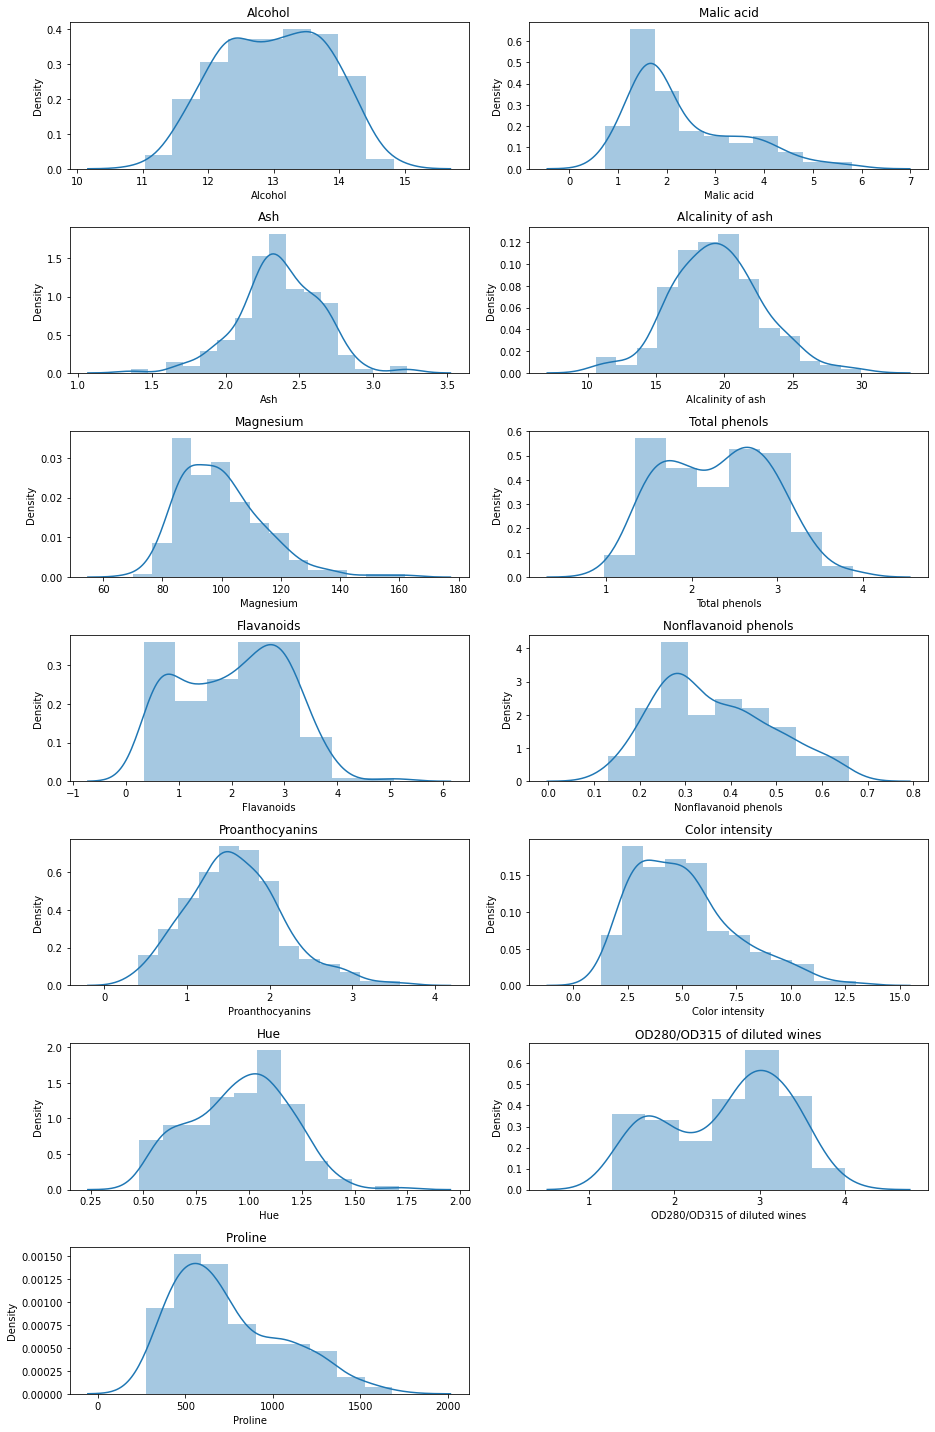

In [18]:
# Distplot of Num Vars
nrows = 7
ncols = 2
repeater = 1

plt.figure(figsize = (13, 20))
for i in wine.columns:
    plt.subplot(nrows, ncols, repeater)
    sns.distplot(wine.loc[:, i])
    plt.title(i)
    repeater+=1
    
plt.tight_layout()
plt.show()

#### Inference:

* All the Numerical Variables are Positively Skewed.

**Let's Create Pair Plot of the Dataset**

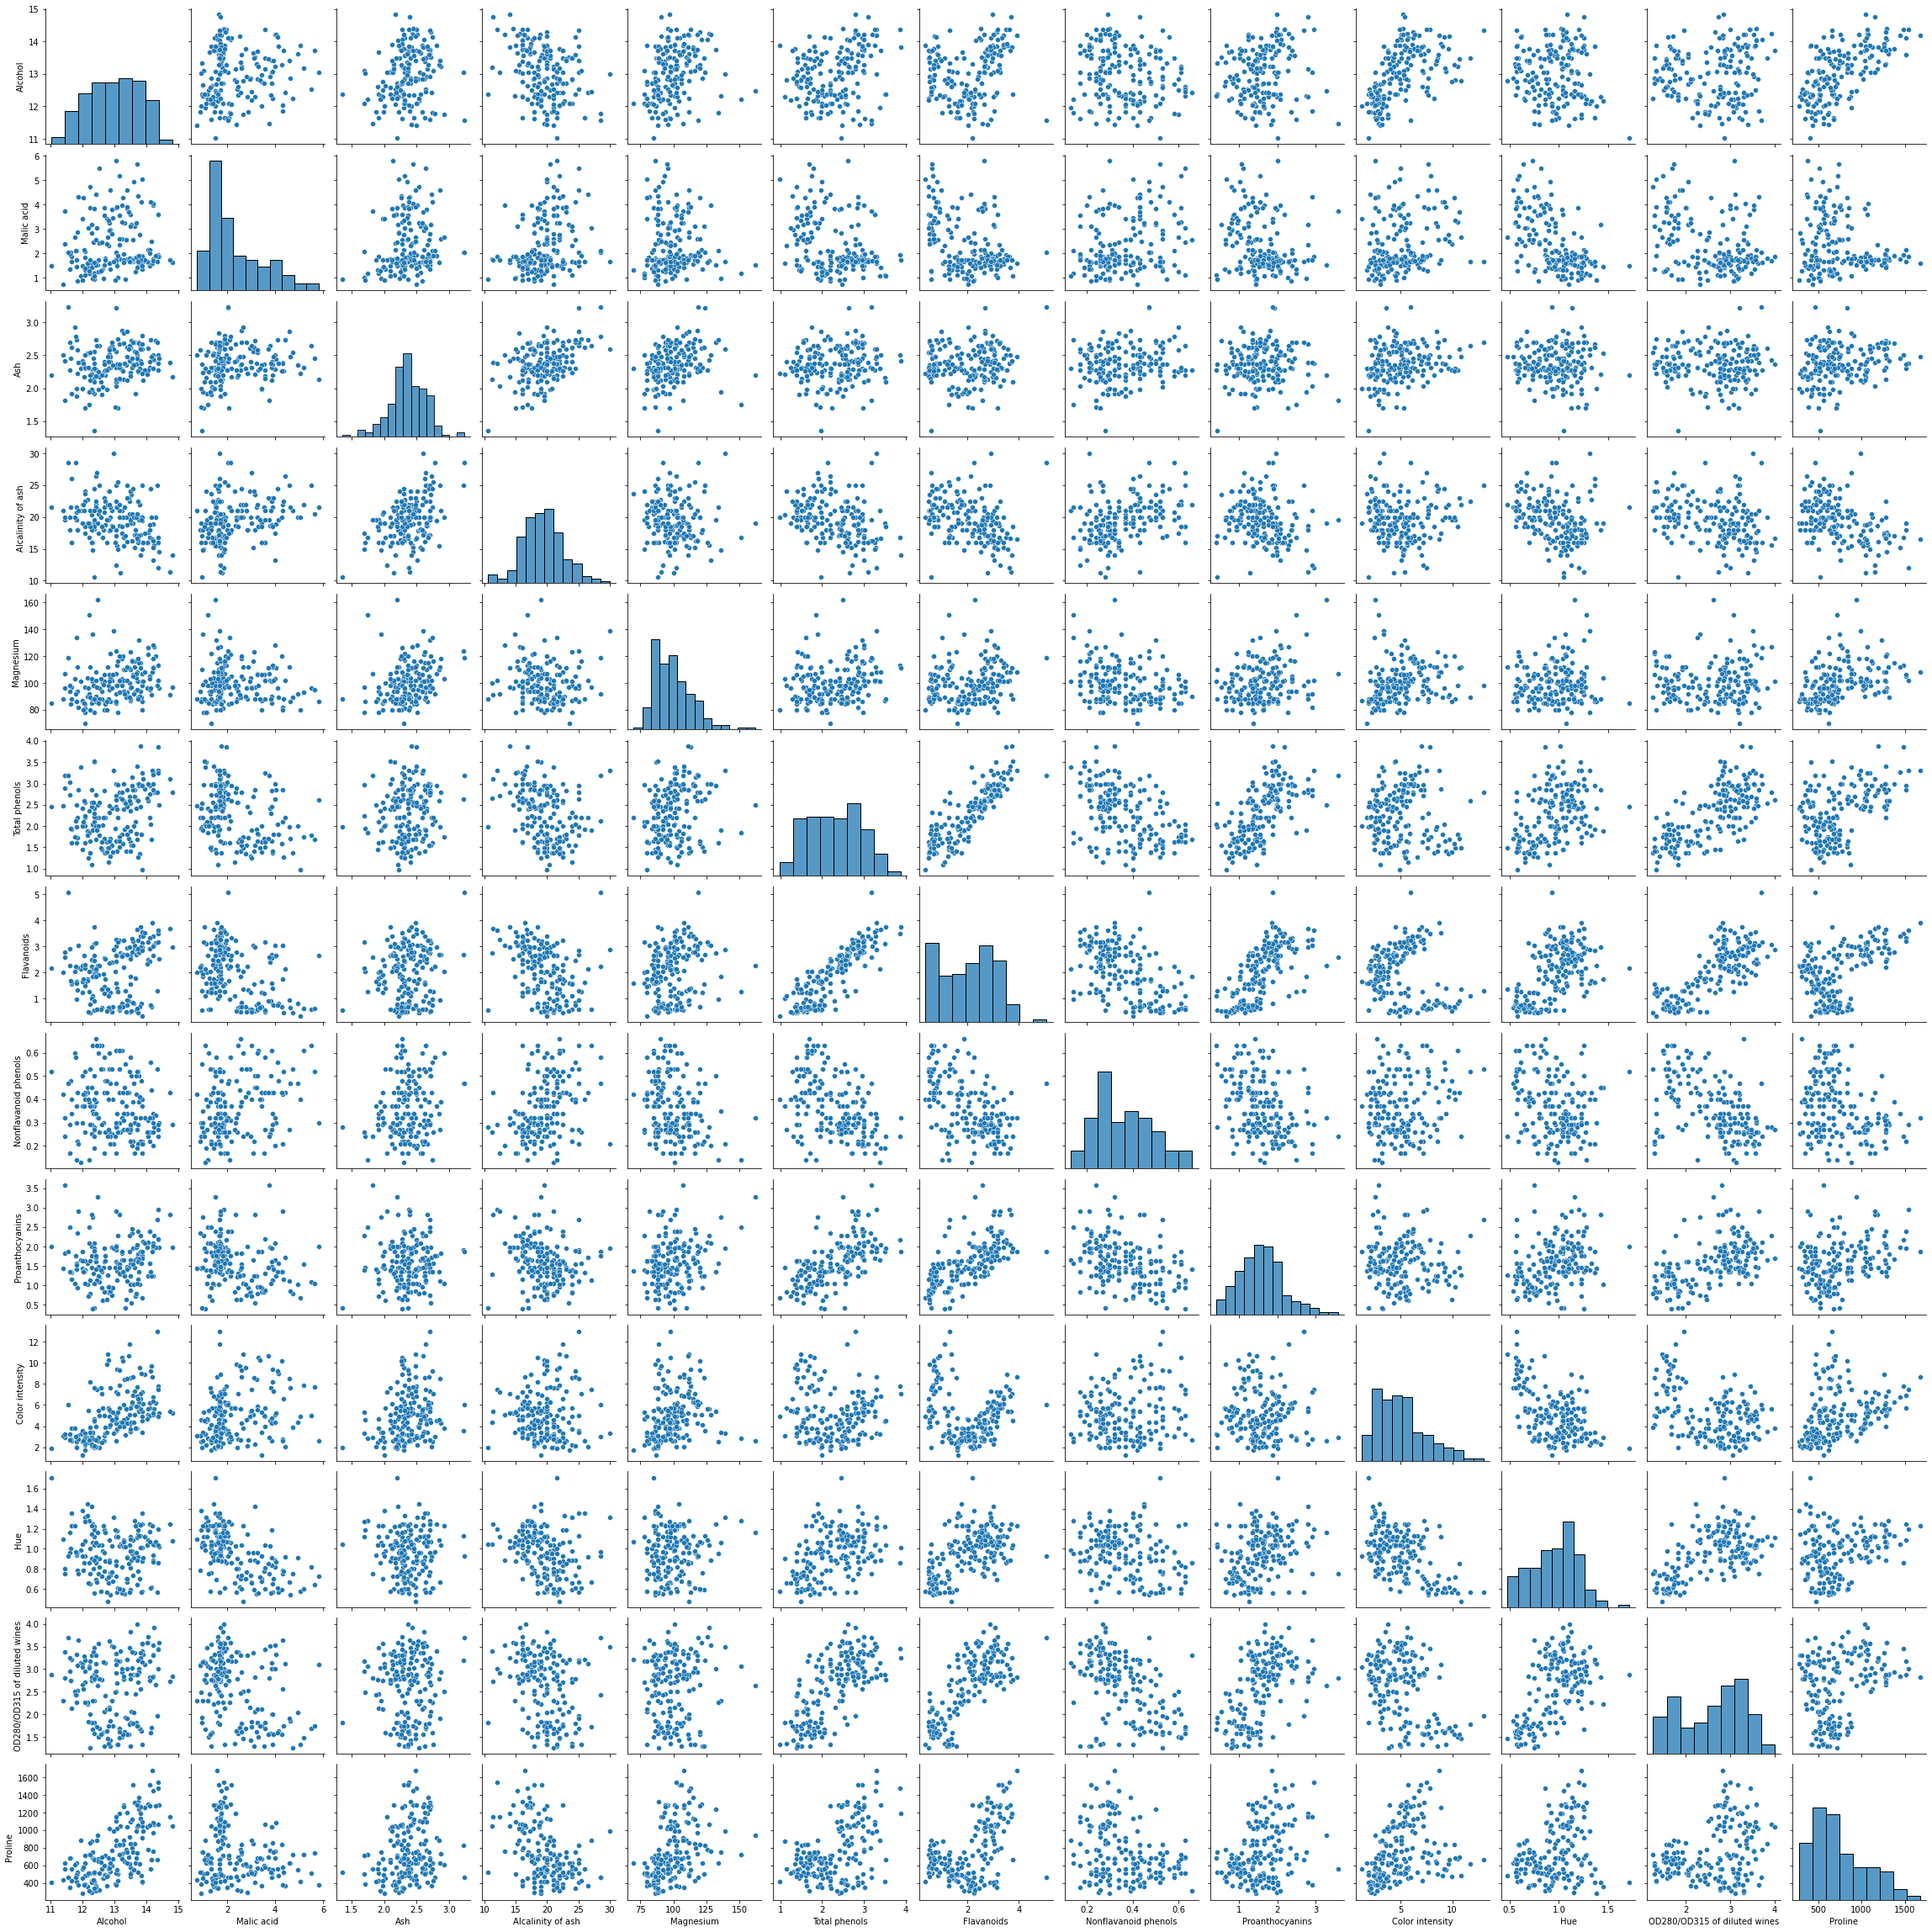

In [19]:
# Wine Dataset - Pairplot
sns.pairplot(wine)

### Checking Outliers in the Data

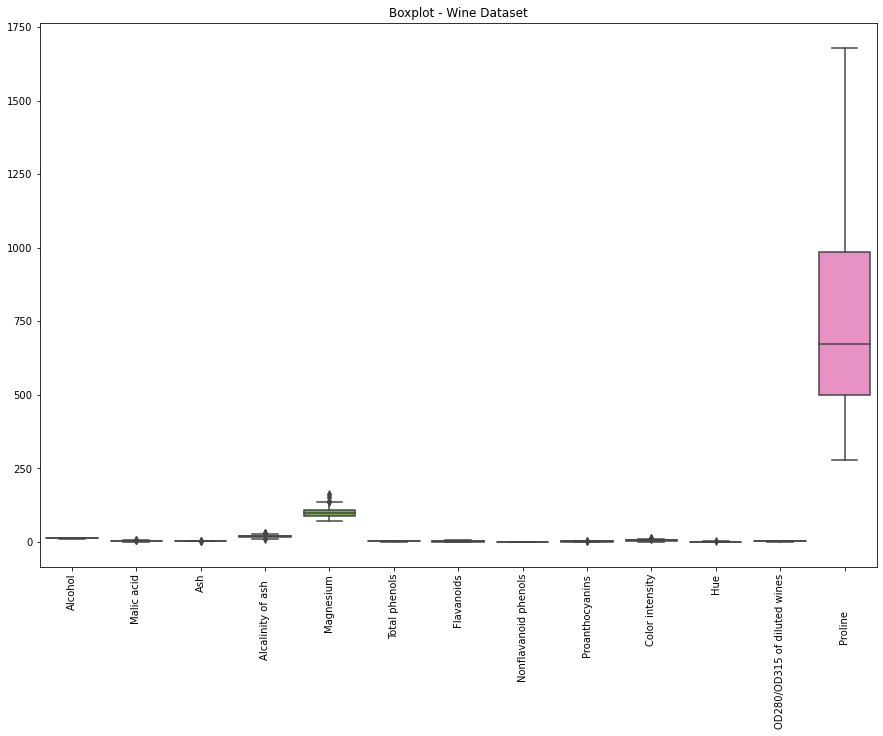

In [27]:
# Checking the Outliers in the Data

plt.figure(figsize=(15, 10))
sns.boxplot(data = wine)
plt.xticks(rotation = 90)
plt.title("Boxplot - Wine Dataset")
plt.show()

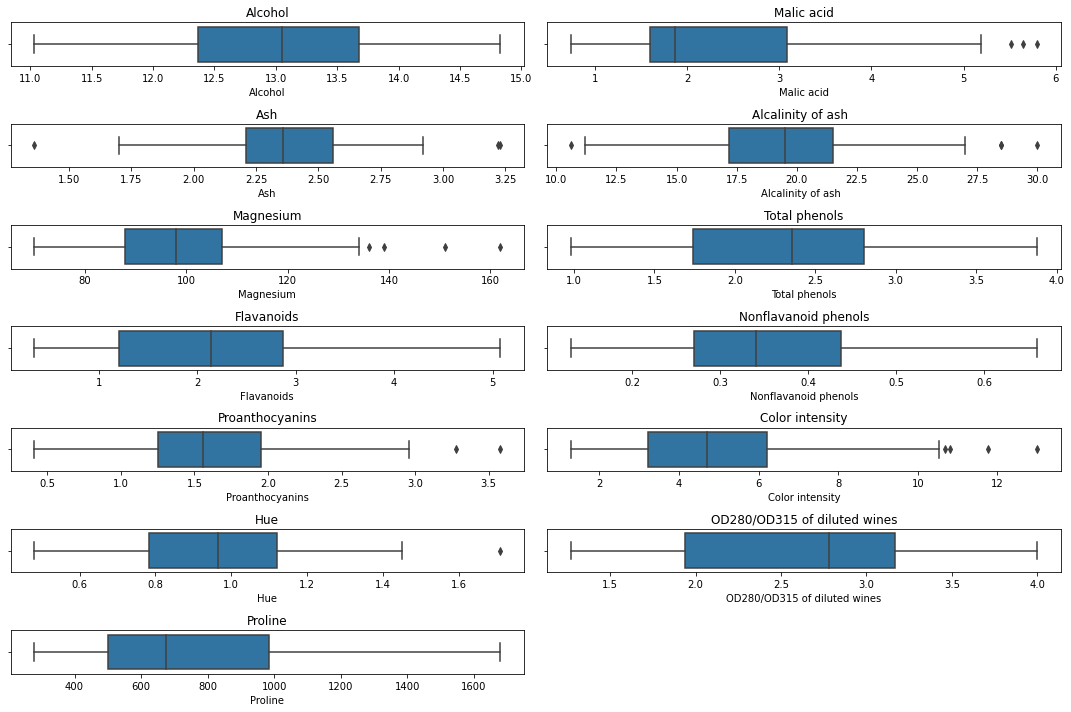

In [34]:
# Lets find the Outliers in the Data

nrows = 7
ncols = 2
repeater = 1

plt.figure(figsize = (15, 10))
for i in wine.columns:
    plt.subplot(nrows, ncols, repeater)
    sns.boxplot(wine.loc[:, i])
    plt.title(i)
    repeater+=1
    
plt.tight_layout()
plt.show()

* **Inference:** We can see that there are not enough outliers in the data except **Color Intensity**, **Magnesium**, **Malic Acid** etc.

Note: We will be using **Standard Scaler** to Scale the Data instead of Standard Scaler as there are not enough Outliers in the Dataset.

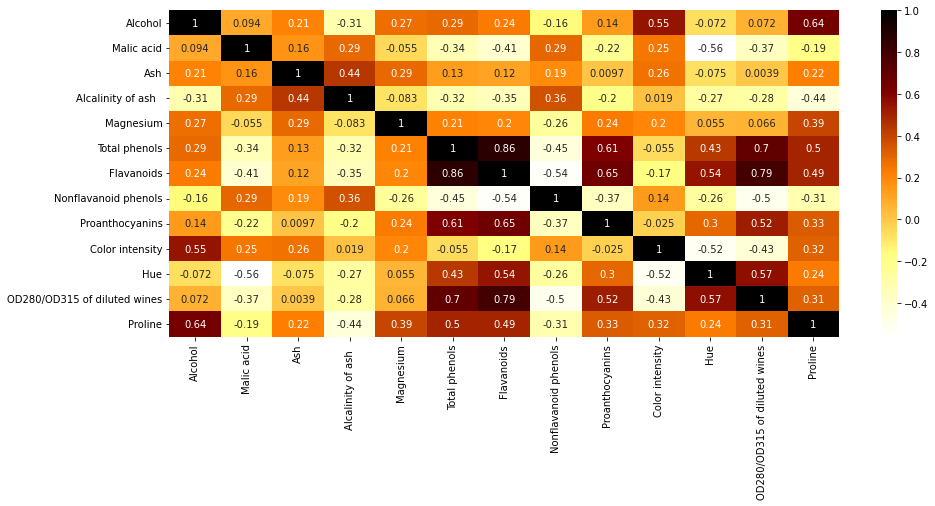

In [50]:
# Check the Correlation
plt.figure(figsize = (15, 6))
sns.heatmap(wine.corr(), annot = True, cmap = "afmhot_r")
plt.show()

Lets evaluate those variables that have more than 50% Correlation amongst each other

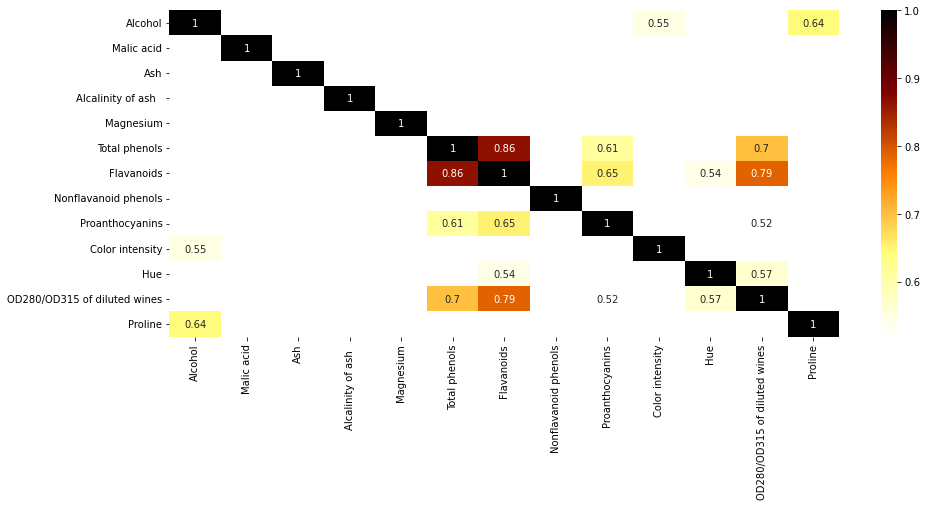

In [49]:
# Correlation>0.50
plt.figure(figsize = (15, 6))
sns.heatmap(wine.corr()[wine.corr()>0.5], annot = True, cmap = "afmhot_r")
plt.show()

**Inference**

* **Alcohol vs Proline:** There is a 64% correlation between the Alcohol and Proline.Since, correlation is the degree of strength between the variables and therefore, it represents strong positive relation between the variables. Remember presence of alcohol decides the quality of the wine and the Proline helps in grape ripening and fermentation. Therefore, it should have a strong relationship which we can clearly see in the data. 


* **Alcohol vs Color Intensity:** There is a 55% correlation between the Alcohol and Color Intensity. It represents strong positive relation between the variables. Since alcohol interacts with the grape skin and thus, plays an integral role in determining the color intensity.


* **Total Phenols vs Flavnoids:** There is a 86% correlation between the Total Phenols and Flavnols. It represents strong positive relation between the variables. The total phenols and flavnols are naturally present in grapes.The presence of higher levels of total phenols and flavonoids can contribute to the color stability, mouthfeel, and overall sensory profile of the wine and therefore, having a correlation makes sense here.


* **Total Phenols vs Proanthocyanins:** There is a 61% correlation between the Total Phenols & Proanthocyanins. The high correlation exists because of their shared chemical structure & similar source within grapes and also contribute to the mouthfeel, and overall sensory profile of the wine and therefore, having a correlation makes sense here.


* **Flavnoids vs OD280/OD315 of diluted wines:** The "OD280/OD315 of diluted wines" measures the optical density at two different wavelengths, which provides insights into the protein content and phenolic composition of the wine. Phenolic compounds, including flavonoids, contribute to the color, flavor, and antioxidant properties of the wine. Thus, they have a very strong correlation amongst themselves which is 79%.

### Missing Value Check

In [51]:
wine.isnull().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

We note that there are no Missing Values in the Dataset

## Why Scaling the Data before Clustering and PCA...

* The primary reason of scaling the data is to ensure that the data lies on the same scale. Algorithms like K-Means, Hierarchical & DBSCAN are sensitive to the scale of the Variables in the data. Variables with large values can easily dominate the clustering process leading to the biased results.

* On the other hand, Standardizing the Data would lead to data on an even/same scale & thereby reducing the anomalous effect of large values in clustering. 

* Another reason is the distance between the points. Clustering algos rely a lot on distance metrics such as `euclidean distance` or `Jaccard Distance (for Categorical Variables)` or `Manhattan Distance` in deploying the Clustering algorithm. If the data has unequal scale/large values, the clustering algo will give more weightage to the large values and would completely discard the small magnitude values. Standardizing would solve this problem.

* PCA aims to capture maximum variance in the data. Large values can dominate the analysis and therefore, by applying scaling, we can bring all the data to same scale which will eventually allow PCA to give equal weights to all the features which applying Dimension Reduction.

### About Standard Scaler

Standard Scaler is a scaling method which is used to bring the data on the Same Scale. It uses `Z Score` approach to scale the data in such a way that each column has a mean of 0 and standard deviation 1.

In [56]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaled_wine = pd.DataFrame(sc.fit_transform(wine), columns = wine.columns)

In [58]:
scaled_wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [59]:
# Notice that all the columns have a mean of 0 and Standard Deviation of 1
scaled_wine.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


## Step 2: Do a Principal Components Analysis (PCA) on the data. Please include (copypaste) the relevant software outputs in your submission while answering the following questions.

PCA works by maximising the variance explained by the PCs.

In [266]:
# Import PCA from sklearn
from sklearn.decomposition import PCA

In [267]:
# Fitting PCA on the Scaled Dataset

principal = PCA()
pca_data = principal.fit_transform(scaled_wine)

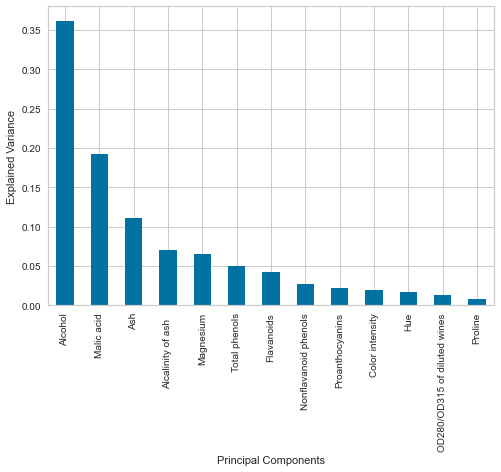

In [268]:
# Barplot of Explained Variance
pd.DataFrame(principal.explained_variance_ratio_, index = wine.columns).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance');

In [269]:
# Lets print the Cumulative Sum of the Variances
np.cumsum(principal.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

In [270]:
# Lets Count the Total No of Components where the Variance threshold is 0.95

threshold = 0.95
print("Req No of Principal Components:", np.argmax(np.cumsum(principal.explained_variance_ratio_)>=threshold))

Req No of Principal Components: 9


In [271]:
# Lets Fit the PCA using 9 Components & Analyse the First Two Components

pca = PCA(n_components=9, random_state =42)

pca_data = pca.fit_transform(scaled_wine)

pca_data = pd.DataFrame(pca_data, columns = ["PC1_", "PC2_", "PC3_", "PC4_",
                                 "PC5_", "PC6_", "PC7_", "PC8_", "PC9_"]+wine.columns[0:9])

pca_data

,PC1_Alcohol,PC2_Malic acid,PC3_Ash,PC4_Alcalinity of ash,PC5_Magnesium,PC6_Total phenols,PC7_Flavanoids,PC8_Nonflavanoid phenols,PC9_Proanthocyanins
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819
...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448


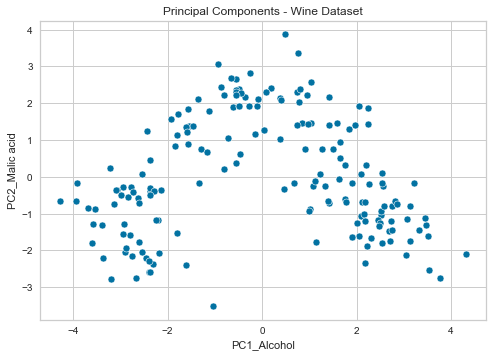

In [272]:
# Lets Visualize the First Two Components
sns.scatterplot(pca_data["PC1_Alcohol"], pca_data["PC2_Malic acid"])
plt.title("Principal Components - Wine Dataset")
plt.show()

## 2.a.Enumerate the insights you gathered during your PCA exercise. Please do not clutter your report with too many insignificant insights as it will dilute the value of your other significant findings.


We will create a DataFrame `pca_load` to store the principal components obtained from PCA. The purpose of building the DataFrame is to analyse the PCA Data.

In [273]:
# Create a DataFrame for the loadings

feature_names = wine.columns
pca_load = pd.DataFrame(principal.components_, index = feature_names, columns = ["PC1", "PC2", "PC3", "PC4",
                                 "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13"])

# Print the loadings
pca_load

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
Malic acid,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
Ash,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
Alcalinity of ash,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
Magnesium,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
Total phenols,-0.213539,-0.536814,-0.154475,0.100825,-0.038144,0.084122,0.018920,0.258594,0.533795,0.418644,-0.105983,-0.265851,-0.119726
Flavanoids,-0.056396,0.420524,-0.149171,-0.286969,0.322883,-0.027925,-0.060685,0.595447,0.372139,-0.227712,0.232076,-0.044764,0.076805
Nonflavanoid phenols,-0.396139,-0.065827,0.170260,-0.427970,0.156361,0.405934,0.187245,0.233285,-0.368227,0.033797,-0.436624,0.078108,-0.120023
Proanthocyanins,0.508619,-0.075283,-0.307694,0.200449,0.271403,0.286035,0.049578,0.195501,-0.209145,0.056218,0.085828,0.137227,-0.575786
Color intensity,0.211605,-0.309080,-0.027125,0.052799,0.067870,-0.320131,-0.163151,0.215535,0.134184,-0.290775,-0.522399,0.523706,0.162116


<AxesSubplot:>

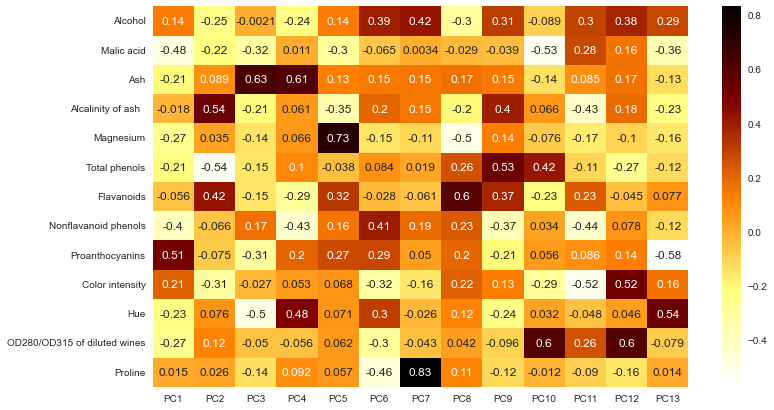

In [303]:
plt.figure(figsize = (12, 7))
sns.heatmap(pca_load, annot = True, cmap = "afmhot_r")

### Principal Components Loading plot

#### What is a Loading Plot

The purpose of a loading data in PCA (Principal Component Analysis) is to find out the relationship between the PCs and the original variables/features present in the dataset. It helps in understanding how each variable contributes to the principal components and how they are weighted.

#### Observations

* In the above table, PC1 has large positive associations with Alcohol, Proanthocyanins followed by Color Intensity and Proline. This makes sense because

* The PC2 has large negative associations with Total phenols, Alcohol, Malic Acid and so on and thus, this component is majorly focused on enhancing the overall quality of wine by ensuring less Alcohol or Malic Acid thereby controlling acidic factors involved in the Wine Preparation.

By Looking at the above plot of Principal Components, the important features that would contribute the most for Wine Preparation appear to be **Proanthocyanins**, **Proline**, **Hue**, **Ash**, **Magnesium**, **Flavnols**, **Total Phenols**, **Color Intensity** & **Hue**. This has been curated on the basis of Correlation over 50%

## 2.b.What are the social and/or business values of those insights, and how the value of those insights can be harnessed―enumerate actionable recommendations for the identified stakeholder in this analysis?

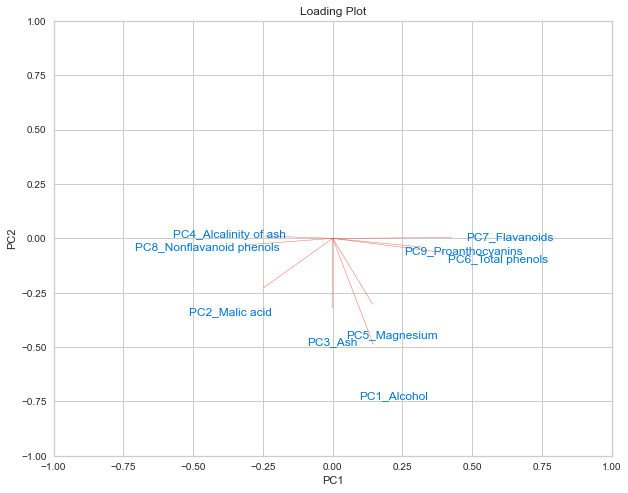

In [294]:
# Loading Plot

comp = pca.components_
features = pca_data.shape[1]

plt.figure(figsize=(10, 8))

# Arrow Plot for PCA
for i in range(features):
    plt.arrow(0, 0, comp[0, i], comp[1, i], color='#E74C3C', alpha=0.5) # 0, 0 represents PCs starting from centre
    plt.text(comp[0, i]*1.5, comp[1, i]*1.5, pca_data.columns[i], color='#0078D7', 
             ha='center', va='center') # 1.5 multiple is for placing the text perfectly on the chart

# Properties of the Plot
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Loading Plot')
plt.grid(True)
plt.show()

### About Loading Plot

* Loading plot is a plot of Principal Components and it is created using plt.arrow function in python. 

* The Objective of the Loading Plot is to visualize the relationship between the principal components (PC1 and PC2) and the original variables. 

* The length and direction of the arrows indicate the strength and direction of the relationship. 

* The Positive Components on the Right Hand Side have a **Positive Correlation with the PC1. For example, Magnesium, Ash, Alcohol etc on the right hand side contribute positively in the Wine Preparation.** Here, positive contribution means keeping the standard range in mind, if we would add some additional quantity of these chemicals, it will enhance the overall taste, aroma & other sensory properties.

* On the Other hand, if we see the relation on the left hand side with PC1, they have **negative correlation such as Malic Acid, Non Flavanoid Phenols followed by Alcalinity of Ash.**

By Looking at the above plot of Principal Components, the important features that would contribute the most for Wine Preparation appear to be **Proanthocyanins**, **Proline**, **Hue**, **Ash**, **Magnesium**, **Flavnols**, **Total Phenols**, **Color Intensity** & **Hue**. This has been curated on the basis of Correlation over 50%

## Step 3: Do a cluster analysis―you may try different algorithms or approaches and go with the one that you find most appropriate― using (i) all chemical measurements (ii) using two most significant PC scores. Pleaseinclude (copy-paste) the relevant software outputs in your submission while answering the following questions.

We will be applying the following:

1. Hierarchical Clustering
2. K Means Clustering 

This is done to compare the Number of Clusters formed in Agglomerative Clustering vs K Means Clustering.

In [160]:
# Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering # Hierarchical Clustering
import scipy.cluster.hierarchy as sch # Dendrogram

In [234]:
# Fitting PCA on all the Chemical Measurements

pca = PCA()
pca_all = pca.fit_transform(scaled_wine)

In [235]:
pca_all = pd.DataFrame(pca_all, columns = ["PC1_", "PC2_", "PC3_", "PC4_",
                                 "PC5_", "PC6_", "PC7_", "PC8_", "PC9_", "PC10_", "PC11_", "PC12_", "PC13_"]+wine.columns)

pca_all


,PC1_Alcohol,PC2_Malic acid,PC3_Ash,PC4_Alcalinity of ash,PC5_Magnesium,PC6_Total phenols,PC7_Flavanoids,PC8_Nonflavanoid phenols,PC9_Proanthocyanins,PC10_Color intensity,PC11_Hue,PC12_OD280/OD315 of diluted wines,PC13_Proline
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


Text(0.5, 1.0, 'Dendrogram - Wine Quality')

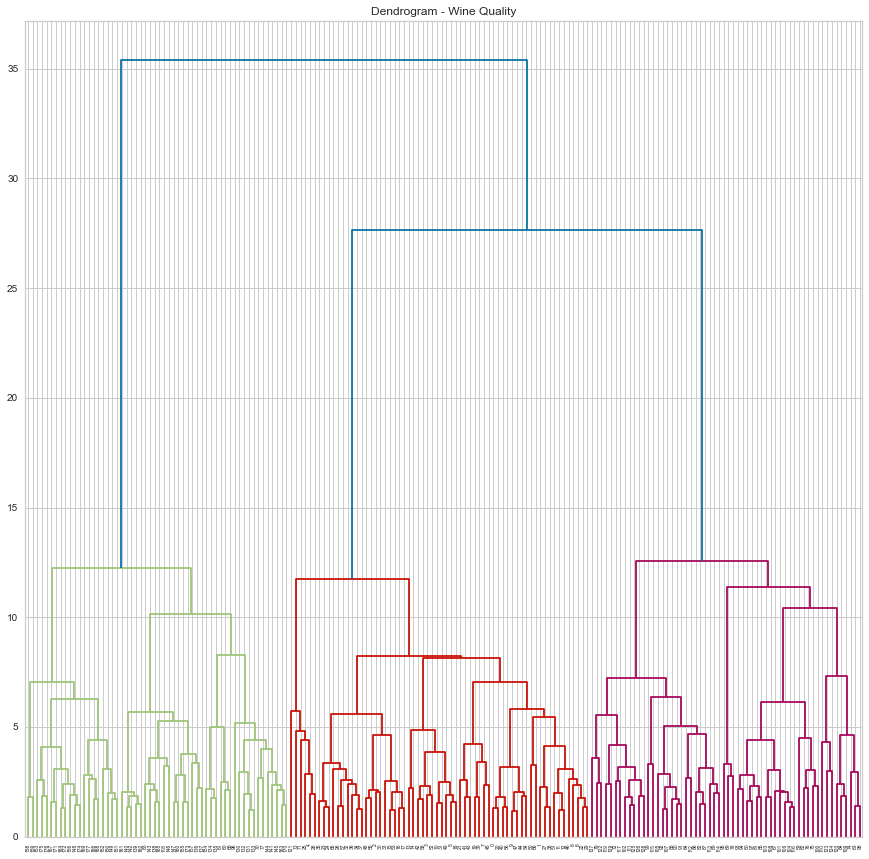

In [238]:
# Plot Dendrogram on the Data

plt.figure(figsize=[15,15])
dend = sch.dendrogram(sch.linkage(scaled_wine, method="ward"))
plt.xticks(rotation=90)
plt.title("Dendrogram - Wine Quality")

Inference: By Looking at the plot above, it is clear that we have 3 Clusters as per Dendrogram

In [242]:
# Fit Agglomerative Clustering

Agg = AgglomerativeClustering(n_clusters=3, linkage = "ward")
pca_all["labels_hierarchy"] = Agg.fit_predict(pca_all)

In [243]:
pca_all.head()

,PC1_Alcohol,PC2_Malic acid,PC3_Ash,PC4_Alcalinity of ash,PC5_Magnesium,PC6_Total phenols,PC7_Flavanoids,PC8_Nonflavanoid phenols,PC9_Proanthocyanins,PC10_Color intensity,PC11_Hue,PC12_OD280/OD315 of diluted wines,PC13_Proline,labels_hierarchy
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239,2
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637,2
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717,2
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484,2
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364,2


In [228]:
df = pca_all.groupby("labels_hierarchy")[pca_all.columns[:-1]].mean()
df = df.reset_index()
df

,labels_hierarchy,PC1_Alcohol,PC2_Malic acid,PC3_Ash,PC4_Alcalinity of ash,PC5_Magnesium,PC6_Total phenols,PC7_Flavanoids,PC8_Nonflavanoid phenols,PC9_Proanthocyanins,PC10_Color intensity,PC11_Hue,PC12_OD280/OD315 of diluted wines,PC13_Proline
0,0,442.940246,-0.985109,0.506689,0.386135,0.185378,0.123710,-0.079353,-0.008162,-0.020170,-0.020368,-0.019440,0.001097,0.000680
1,1,-282.742544,-1.957291,0.042837,0.299174,0.031566,0.083690,-0.014398,0.021043,-0.046671,-0.038226,-0.013056,0.009406,0.000378
2,2,-15.580494,3.245002,-0.472505,-0.690948,-0.192602,-0.206273,0.083545,-0.019368,0.074629,0.064310,0.032296,-0.012585,-0.001032


### K means Clustering

* We will be using Yellowbrick Library in python to initiate `KElbowVisualizer`. `KElblowVisualizer` uses **Elbow Method** to find the **Optimal number of Clusters** in the dataset.

* `KElbowVisualizer` would create the Screeplot/Elbow Plot where the X-axis is the Number of Clusters and Y-axis is the WCSS (Within Cluster Sum of Squared). WCSS represents the sum of squared distance of centroid with each point. Thus, as the number of Clusters increase, the WCSS start to decrease.

* At the point till sharp decline post which there is a very low decline of WCSS represents the ideal cluster value aka Elbow Point in the Data. Thus, we can use the KElbow Visualizer to the find the Ideal Cluster Value.

In [239]:
# KElbow Visualizer

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=0)

elbow = KElbowVisualizer(kmeans, k = (1, 12))

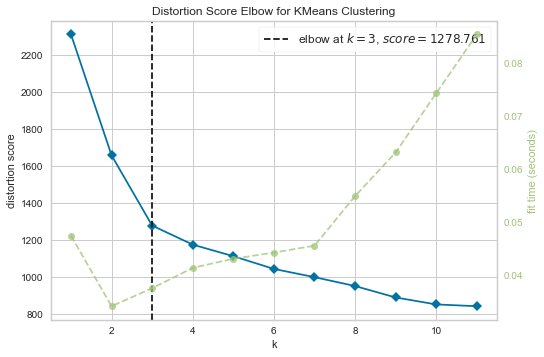

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [240]:
# Fitting KElbow Visualizer and Visualizing the Clusters

elbow.fit(scaled_wine)
elbow.show()

#### Inference of the Above Plot:

Note: We are getting the Optimal Clusters =3 where the score is 2370696.284 which corresponds to inertia at k = 3.

Remember WCSS represents the overall compactness of the Clusters formed. The Objective of the K Means Clustering is to reduce the Intra Cluster Distance and Maximize the Inter Cluster Distance so that the cluster formation should be clearly visible using Visualization.


In [244]:
# Fitting K Means Clustering

kmeans = KMeans(n_clusters=3, random_state = 0)

kmeans.fit(pca_all)

# Storing Labels in the Scaled and Original Dataset
pca_all["kmeans_labels"] = kmeans.labels_

# Cluster Centroids
centroids = kmeans.cluster_centers_

In [251]:
df = pca_all.groupby("kmeans_labels")[pca_all.columns[:-2]].mean()
df = df.reset_index().sort_values(by="kmeans_labels", ascending = False)
df

,kmeans_labels,PC1_Alcohol,PC2_Malic acid,PC3_Ash,PC4_Alcalinity of ash,PC5_Magnesium,PC6_Total phenols,PC7_Flavanoids,PC8_Nonflavanoid phenols,PC9_Proanthocyanins,PC10_Color intensity,PC11_Hue,PC12_OD280/OD315 of diluted wines,PC13_Proline
2,2,2.245083,-0.833571,0.009059,-0.115699,-0.154252,-0.177367,0.024427,-0.001028,-0.026802,0.044151,-0.005874,-0.000414,0.046850
1,1,-0.116268,1.799844,0.187176,0.069921,0.101111,0.103753,0.024061,0.007155,0.011625,0.004276,0.012834,0.003276,-0.007535
0,0,-2.720036,-1.125651,-0.239093,0.062457,0.073676,0.099925,-0.060383,-0.007388,0.020027,-0.061468,-0.008116,-0.003455,-0.050551


## 3.c. Any more insights you come across during the clustering exercise?

* That there are only 3 clusters in the Data. The entire data can be segmented in 3 parts only. There cannot be any other cluster other than 3 clusters.

* Each cluster is a group of wines exhibiting similar properties. By analyzing the data within each cluster, we can identify patterns and characteristics that are unique to that cluster.

* The Clustering Analysis can provide valuable information for the wine industry. It can aid in market segmentation, targeted marketing strategies, product development, and quality assessment. Winemakers and businesses can leverage these insights to make informed decisions and optimize their wine production processes.

## 3.d.Are there clearly separable clusters of wines? How many clusters did you go with? How the clusters obtained in part (i) are different from or similar to clusters obtained in part (ii), qualitatively?

In [248]:
pca_all.head()

,PC1_Alcohol,PC2_Malic acid,PC3_Ash,PC4_Alcalinity of ash,PC5_Magnesium,PC6_Total phenols,PC7_Flavanoids,PC8_Nonflavanoid phenols,PC9_Proanthocyanins,PC10_Color intensity,PC11_Hue,PC12_OD280/OD315 of diluted wines,PC13_Proline,labels_hierarchy,kmeans_labels
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239,2,2
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637,2,2
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717,2,2
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484,2,2
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364,2,2


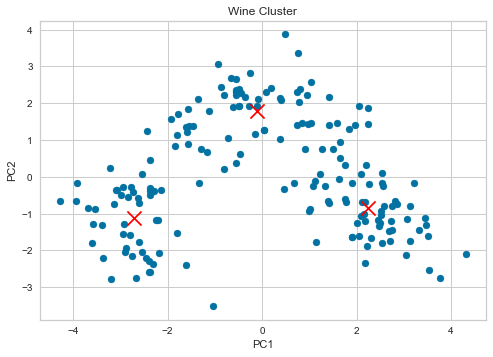

In [247]:
# lets visualize the PC1 and PC2

plt.scatter(pca_all['PC1_Alcohol'],pca_all['PC2_Malic acid'])
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=200,c='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Wine Cluster')
plt.show()

### Analyzing Clustering on Two Components

In [256]:
pca = PCA(n_components=2)
pca_two_comp = pca.fit_transform(scaled_wine)

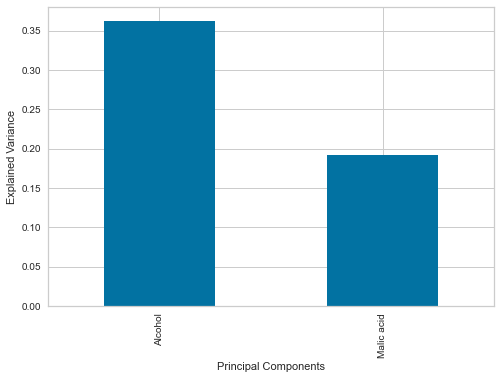

In [262]:
# Barplot of Explained Variance
pd.DataFrame(pca.explained_variance_ratio_, index = wine.columns[0:2]).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance');

In [263]:
# Preparing the Data and Fitting K Means Clustering with 3 Clusters
pca_two_comp = pd.DataFrame(pca_two_comp, columns = ["PC1_", "PC2_"]+wine.columns[:2])

kmeans = KMeans(n_clusters=3, random_state = 0)
two_pcs = pca_two_comp.loc[:, ["PC1_Alcohol", "PC2_Malic acid"]] 
kmeans.fit(two_pcs)

# Storing Labels in the Scaled and Original Dataset
two_pcs["kmeans_labels"] = kmeans.labels_

# Cluster Centroids
centroids = kmeans.cluster_centers_

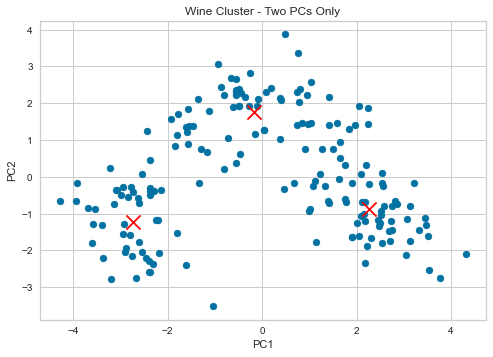

In [264]:
plt.scatter(two_pcs['PC1_Alcohol'],two_pcs['PC2_Malic acid'])
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=200,c='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Wine Cluster - Two PCs Only')
plt.show()

### Observations for 3.d.
* We can see that there are 3 Clusters getting formed whether it is Dendrogram or KElbowVisualizer.
* From the Data Visualization between PC1 and PC2, we can see that there are 3 clusters emerging in the data. These clusters are not clearly separable however, we can figure out the separation very clearly.

#### Analyzing Clusters Formed in part I vs II

* Seems like there is no difference between the Clusters formed using All the Chemical Measurements vs Two PCs. The results of Clustering are Similar here.

## 3.f.Could you suggest a subset of the chemical measurements that can separate wines more distinctly? How did you go about choosing that subset? How do the rest of the measurements that were not included while clustering, vary across those clusters?

* By Looking at the Correlation plot of the Loading Data of Principal Components, the important features that would contribute the most for Wine Preparation appear to be **Proanthocyanins**, **Proline**, **Hue**, **Ash**, **Magnesium**, **Flavnols**, **Total Phenols**, **Color Intensity** & **Hue**. 

* We decided the above features on the Basis of Loading Data Created for Question 2. Since these have a good positive relation with the Principal Components in the Wine Dataset and therefore, if we focus on finding best permutation combination of the precise chemical quantities involved in preparation, I believe, the businesses would do a fantastic job of manufacturing best quality wines.

* The other variables will serve as a deviation from the ideal preparation process however, as a business we need to see how much deviation they can afford keeping the quality of the wine intact.

## Overall Summary

The application of Principal Component Analysis (PCA) in the wine industry can help address the challenge of dealing with a large number of variables. By leveraging PCA, valuable insights can be derived from the data, and clustering techniques can be applied to identify patterns that can revolutionize the wine industry and provide new perspectives on producing high-quality wines. 

**This approach not only contributes to enhancing wine production processes, quality assessment, and market segmentation but also enables better consumer understanding, leading to informed business decisions and potential competitive advantages.**

Several key variables play important roles in wine preparation. The ideal levels for these variables are as follows:

1. Alcohol: The average alcohol content in the dataset is around 13%, which falls within the desired range for wine production.

2. Malic acid: The mean malic acid content is approximately 2.366 g/L, with a standard deviation of 1.1171 g/L. The recommended range for malic acid in white wines is 1.5 to 5.5 g/L and 0.2 to 2.0 g/L in red wines. Malic acid adds a crisp, tart taste to wines and helps maintain acidity during the winemaking process.

3. Alcalinity of ash: The alcalinity of ash represents the mineral content present in the wine, influencing its pH level and acidity. The mean alcalinity of ash is around 19.49, with a standard deviation of 3.34, indicating variations in acidity levels among wines.

4. Magnesium: Magnesium plays a crucial role in yeast fermentation, color compounds, and pH regulation in wines. The recommended concentration of magnesium is typically between 50 and 200 mg/L, and the mean magnesium content in the dataset is approximately 99.74, falling within the acceptable range.

5. Total phenols: Total phenols contribute to the aging potential and stability of wines. The average total phenols content is approximately 2.30, with a standard deviation of 0.63. Wines with appropriate levels of total phenols have better aging potential and improved sensory properties.

6. Flavanoids: Flavanoids are a subgroup of phenolic compounds known for their contribution to wine taste and aroma. The average flavanoid content is around 2.03, with a range from 0.34 to 5.08, reflecting the presence of flavanoids in the wines.

7. Proline: Proline is an amino acid found in grapes that affects grape ripening and wine fermentation. The mean proline content is approximately 746.89, with a range from 278 to 1680. Proline contributes to the structure and aging potential of wines.

In terms of correlations between variables, the presence of a **64% correlation between alcohol and proline** indicates a strong positive relationship, which aligns with the fact that alcohol content influences wine quality, while proline affects grape ripening and fermentation. 

Additionally, **correlations between alcohol and color intensity (55%)**, **total phenols and flavanoids (86%)**, and **total phenols and proanthocyanins (61%)** reflect meaningful associations between these variables, considering their shared chemical composition and their impact on wine characteristics.

By conducting PCA and analyzing the loading plot, we can interpret the relationships between the principal components and the original variables in the wine dataset. The loading plot provides insights into variable importance, variable relationships, and dimension reduction. 

This information helps identify the key variables that contribute significantly to the separation and clustering of data points in the PCA space, assisting in feature selection and understanding the primary factors driving data variability.

Overall, by employing PCA and subsequent analysis techniques, the wine industry can gain valuable insights into the relationships between variables, identify critical factors for wine production, and make informed decisions to enhance the quality of wines.

In [315]:
pca_all.to_csv("pca_all.csv", index = False)
pca_data.to_csv("pca_9comp.csv", index = False)
pca_two_comp.to_csv("pca_2comp.csv", index = False)
pca_load.to_csv("pca_components.csv", index = False)